In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
import warnings; warnings.filterwarnings('ignore')

In [73]:
df = pd.read_csv("dataset/spam.csv")

In [74]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [76]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

- we can remove `Unnamed: 2`, `Unnamed: 3`, `Unnamed: 4` bcz more then 90% data is missing.

In [77]:
df.drop(labels=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [78]:
df.rename(columns = {'v1':'label','v2':'text'}, inplace = True)

In [79]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [80]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

- There are 2 category present in `label` which are **ham** and **spam**, therefore we can label them in numbers by label encoder

In [81]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["label"] = encoder.fit_transform(df["label"])

- Ham - 0
- spam - 1

In [82]:
# checking duplicated

df.duplicated().sum()

403

In [83]:
df.drop_duplicates(keep="first", inplace=True)
df.duplicated().sum()

0

## EDA

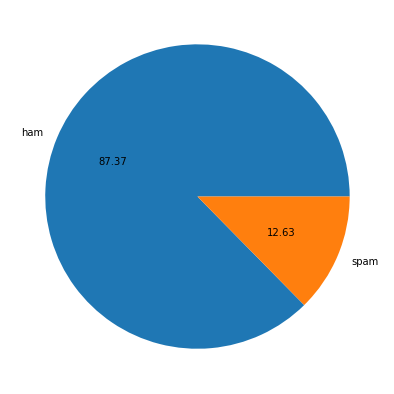

In [84]:
plt.figure(figsize=(7,7), facecolor='white')
plt.pie(df["label"].value_counts(), labels=["ham","spam"], autopct="%.2f")
plt.show()

- Data is imbalance, spam category in only 12% of total. 

In [85]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [86]:
df["num_character"] = df["text"].apply(len)

In [87]:
df["num_words"] = df["text"].apply(lambda x : len(nltk.word_tokenize(x)))

In [88]:
df["num_sentences"] = df["text"].apply(lambda x : len(nltk.sent_tokenize(x)))

In [89]:
df.head()

,label,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [90]:
# Describe Over all
df[["num_character","num_words","num_sentences"]].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [91]:
# Describe only ham
df[df["label"] == 0][["num_character","num_words","num_sentences"]].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [92]:
# Describe only spam
df[df["label"] == 1][["num_character","num_words","num_sentences"]].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


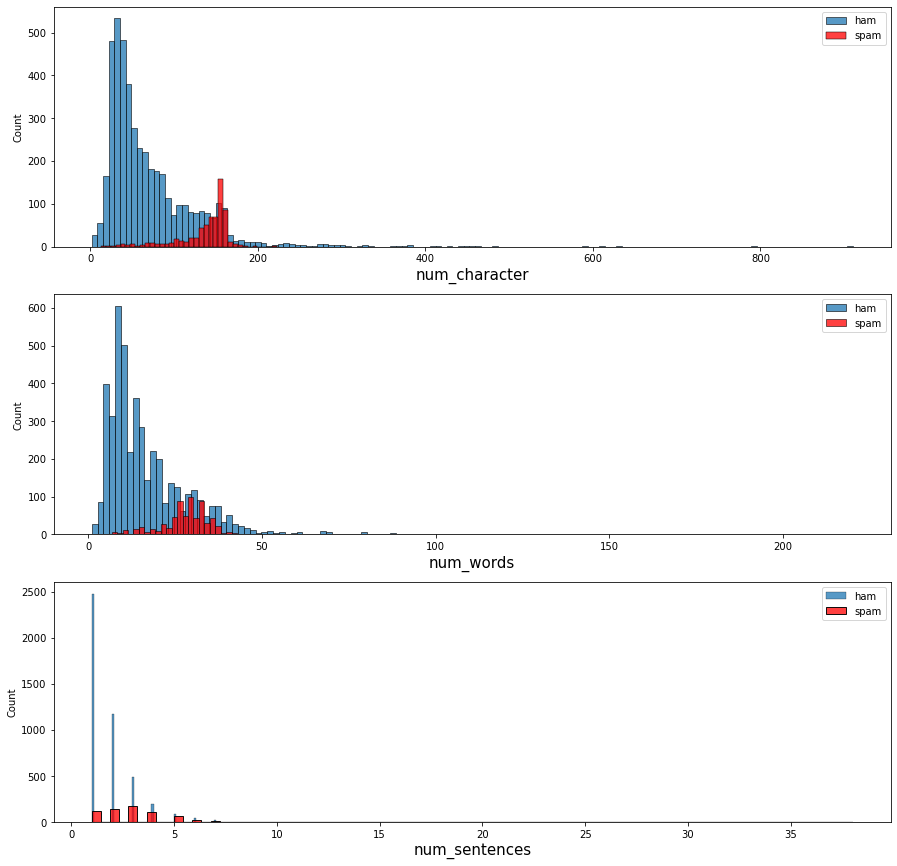

In [93]:
# let's see how data is distributed for every column
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in df.drop(labels=["label","text"],axis=1):
    if plotnumber<=3 :
        ax = plt.subplot(3,1,plotnumber)
        sns.histplot(df[df["label"]== 0 ][column])
        sns.histplot(df[df["label"]== 1 ][column], color="red",)
        plt.xlabel(column,fontsize=15)
        plt.legend(labels=["ham","spam"])
        
    plotnumber+=1
plt.show()

- Generally count of `num_character` and `num_word` is more in span as compared to ham

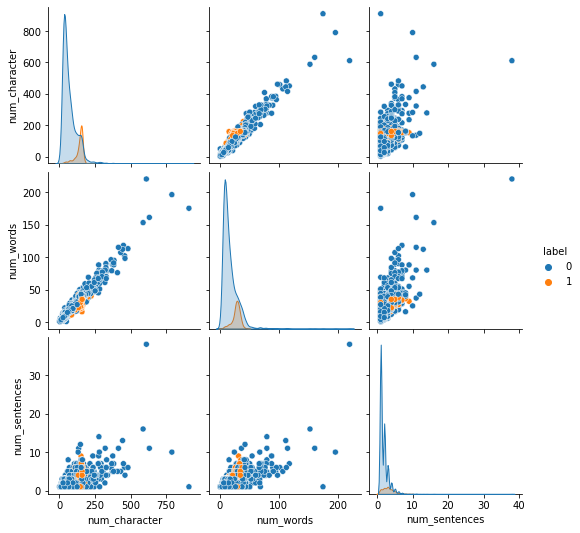

In [94]:
sns.pairplot(df, hue="label",)

- there are ouliers in data 

<AxesSubplot:>

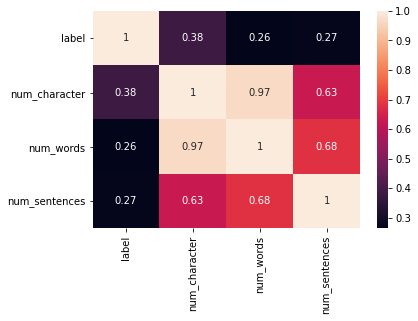

In [95]:
sns.heatmap(df.corr(),annot=True)

In [96]:
# Filter for correlation value greater than threshold
corr = df.corr()
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
display(sort[(sort > 0.7) & (sort < 1)])

num_character  num_words        0.966087
num_words      num_character    0.966087
dtype: float64

- `num_words`, `num_character`, `num_sentences` have high correlation with each other. so we will keep only one of the feature which is `num_character` because it has high variance with our taget feature which is `lable`

In [97]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [98]:
corpus = []
for row in df["text"]:
    review = re.sub('[^a-zA-Z]', ' ', row) #removing numbers
    review = review.lower()
    review = review.split()
    clean = []
    for word in words:
        if word.isalnum():
            clean.append(word)
    # removing stop words and doing stemming
    clean = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    clean = ' '.join(clean)
    corpus.append(clean)

In [99]:
df["cleaned_text"] = corpus

In [100]:
df.head()

,label,text,num_character,num_words,num_sentences,cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [101]:
ham_text = ' '.join(df[df["label"] == 0]['cleaned_text'])
spam_text = ' '.join(df[df["label"] == 1]['cleaned_text'])

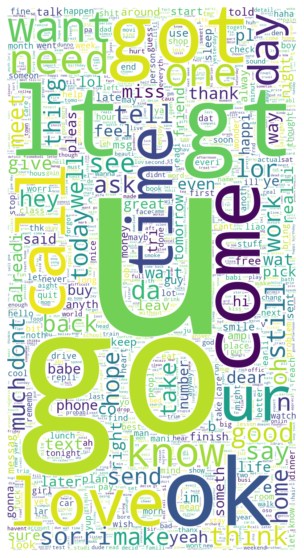

In [102]:
from wordcloud import WordCloud, ImageColorGenerator

wc= WordCloud(background_color="white", random_state=1, max_words = 2000, width =800, height = 1500)
wc.generate(ham_text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

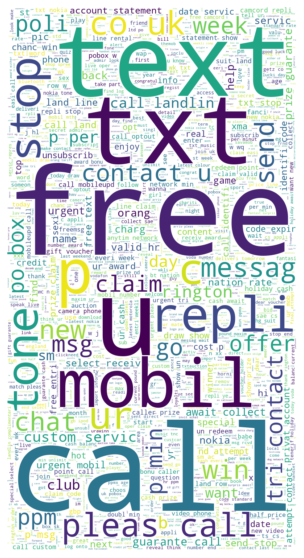

In [103]:
wc= WordCloud(background_color="white", random_state=1, max_words = 2000, width =800, height = 1500)
wc.generate(spam_text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [104]:
spam_corpus = []
for msg in df[df['label'] == 1]['cleaned_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
ham_corpus = []
for msg in df[df['label'] == 0]['cleaned_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

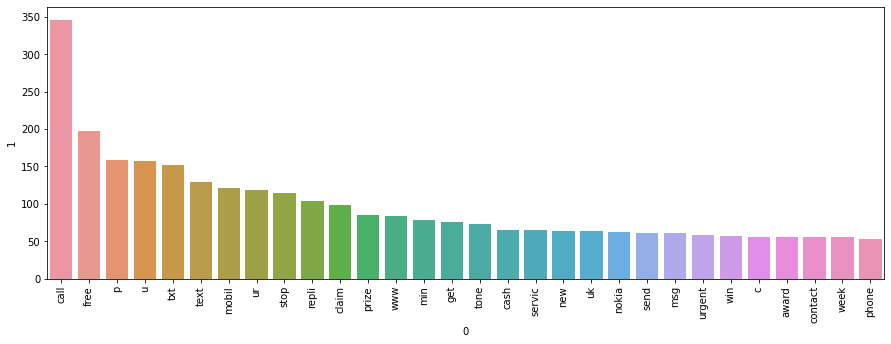

In [117]:
from collections import Counter
plt.figure(figsize=[15,5])
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

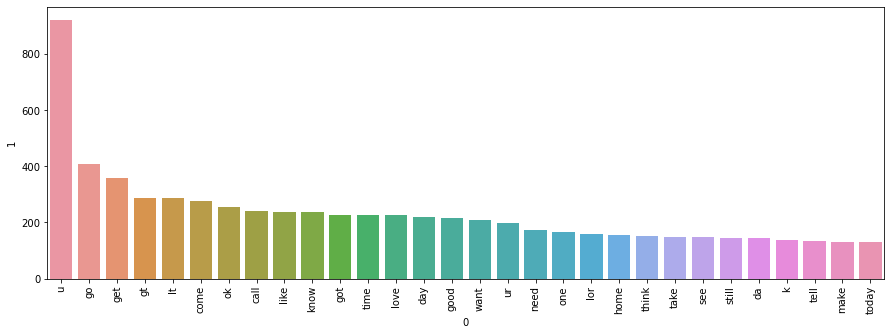

In [118]:
plt.figure(figsize=[15,5])
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### Model Building

In [119]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()

In [121]:
X = cv.fit_transform(df['cleaned_text']).toarray()

In [122]:
y = df["label"].values

In [123]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [124]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

accuracy_score :  0.8810444874274661
precision_score :  0.5339366515837104


Text(0.5, 1.0, 'confusion_matrix')

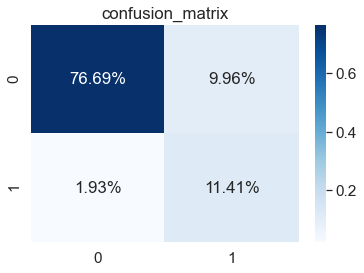

In [137]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy_score : ", accuracy_score(y_test,y_pred1))
print("precision_score : ",precision_score(y_test,y_pred1))
df_cm  = confusion_matrix(y_test,y_pred1)

sns.heatmap(df_cm/np.sum(df_cm), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title("confusion_matrix")

accuracy_score :  0.9700193423597679
precision_score :  0.8543046357615894


Text(0.5, 1.0, 'confusion_matrix')

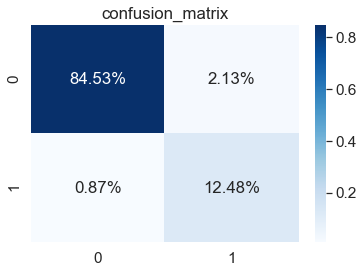

In [138]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print("accuracy_score : ", accuracy_score(y_test,y_pred1))
print("precision_score : ",precision_score(y_test,y_pred1))
df_cm  = confusion_matrix(y_test,y_pred1)

sns.heatmap(df_cm/np.sum(df_cm), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title("confusion_matrix")

accuracy_score :  0.9758220502901354
precision_score :  0.952


Text(0.5, 1.0, 'confusion_matrix')

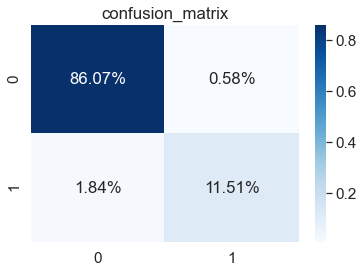

In [139]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print("accuracy_score : ", accuracy_score(y_test,y_pred1))
print("precision_score : ",precision_score(y_test,y_pred1))
df_cm  = confusion_matrix(y_test,y_pred1)

sns.heatmap(df_cm/np.sum(df_cm), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title("confusion_matrix")

### Uing Tfidf

In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf = TfidfVectorizer(max_features=3000)

In [170]:
X = Tfidf.fit_transform(df['cleaned_text']).toarray()

In [171]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [172]:
gnb_tfidf = GaussianNB()
mnb_tfidf = MultinomialNB()
bnb_tfidf = BernoulliNB()

accuracy_score :  0.8762088974854932
precision_score :  0.5231481481481481


Text(0.5, 1.0, 'confusion_matrix')

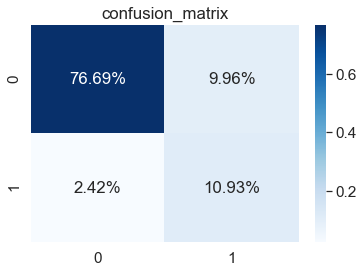

In [173]:
gnb_tfidf.fit(X_train,y_train)
y_pred1 = gnb_tfidf.predict(X_test)
print("accuracy_score : ", accuracy_score(y_test,y_pred1))
print("precision_score : ",precision_score(y_test,y_pred1))
df_cm  = confusion_matrix(y_test,y_pred1)

sns.heatmap(df_cm/np.sum(df_cm), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title("confusion_matrix")

accuracy_score :  0.9738878143133463
precision_score :  1.0


Text(0.5, 1.0, 'confusion_matrix')

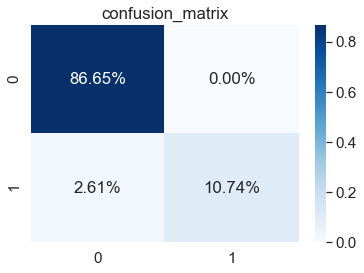

In [174]:
mnb_tfidf.fit(X_train,y_train)
y_pred1 = mnb_tfidf.predict(X_test)
print("accuracy_score : ", accuracy_score(y_test,y_pred1))
print("precision_score : ",precision_score(y_test,y_pred1))
df_cm  = confusion_matrix(y_test,y_pred1)

sns.heatmap(df_cm/np.sum(df_cm), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title("confusion_matrix")

accuracy_score :  0.9835589941972921
precision_score :  0.984


Text(0.5, 1.0, 'confusion_matrix')

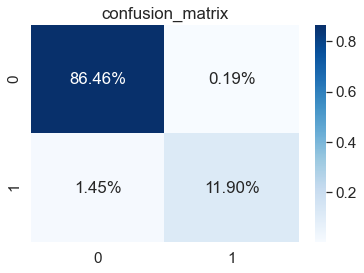

In [175]:
bnb_tfidf.fit(X_train,y_train)
y_pred1 = bnb_tfidf.predict(X_test)
print("accuracy_score : ", accuracy_score(y_test,y_pred1))
print("precision_score : ",precision_score(y_test,y_pred1))
df_cm  = confusion_matrix(y_test,y_pred1)

sns.heatmap(df_cm/np.sum(df_cm), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title("confusion_matrix")

In [176]:
 # Best model --> **mnb_tfidf**

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [178]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [179]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [180]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [181]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9669421487603306
For  KN
Accuracy -  0.9090909090909091
Precision -  1.0
For  NB
Accuracy -  0.9738878143133463
Precision -  1.0
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8018018018018018
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9514563106796117
For  RF
Accuracy -  0.9758220502901354
Precision -  0.991304347826087
For  AdaBoost
Accuracy -  0.9709864603481625
Precision -  0.9655172413793104
For  BgC
Accuracy -  0.9545454545454546
Precision -  0.8321167883211679
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.959349593495935
For  GBDT
Accuracy -  0.9448742746615088
Precision -  0.9263157894736842
[16:36:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  xgb
Accuracy -  0.9748549323017408
Precision -  0.9590

In [182]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

performance_df

,Algorithm,Accuracy,Precision
1,KN,0.909091,1.000000
2,NB,0.973888,1.000000
5,RF,0.975822,0.991304
0,SVC,0.975822,0.966942
6,AdaBoost,0.970986,0.965517
8,ETC,0.975822,0.959350
10,xgb,0.974855,0.959016
4,LR,0.956480,0.951456
9,GBDT,0.944874,0.926316
7,BgC,0.954545,0.832117


In [183]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.909091
1,NB,Accuracy,0.973888
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,AdaBoost,Accuracy,0.970986
5,ETC,Accuracy,0.975822
6,xgb,Accuracy,0.974855
7,LR,Accuracy,0.956480
8,GBDT,Accuracy,0.944874
9,BgC,Accuracy,0.954545


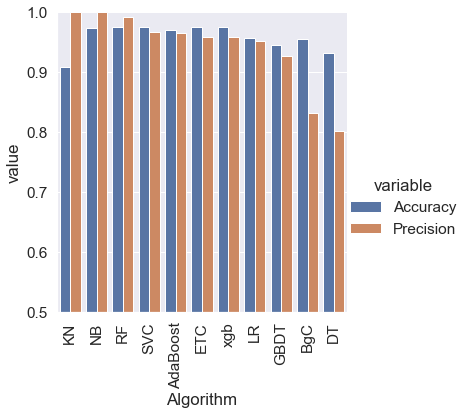

In [184]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [185]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [197]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [198]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [199]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [200]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.983739837398374


In [190]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [191]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [192]:
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.96875


In [202]:
# taken the model with highest Accuracy and Precision 
import pickle
pickle.dump(Tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb_tfidf,open('model.pkl','wb'))

### Spam sms example

1. Payment Protection Insurance (PPI)
    - IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.
2. Quick Loans
    - A [redacted] loan for £950 is approved for you if you receive this SMS. 1 min verification & cash in 1 hr at www [redacted].co.uk to opt out reply stop
3. Accident compensation
    - You have still not claimed the compensation you are due for the accident you had. To start the process please reply YES. To opt out text STOP
4. Debt forgiveness
    - Due to a new legislation, those struggling with debt can now apply to have it written off. For more information text the word INFO or to opt out text STOP
5. Pension reviews
    - Our records indicate your Pension is under performing to see higher growth and up to 25% cash release reply PENSION for a free review. To opt out reply STOP